In [1]:
import cv2
import matplotlib.pyplot as plt
import math
import numpy as np

Prática de Histogramas

a) Produza a imagem ‘negativa’ do arquivo ‘im_cells.png’

b) Com a imagem negativa, produza a imagem original novamente.

c) Mostre lado a lado a imagem original e a negativa. Em qual deles os objetos presentes na imagem são melhor percebidos? Justifique.

d) Aplique a imagem uma função logarítmica.

In [2]:
imagem_original = cv2.imread("im_cells.png");

imagem_negativa = 255 - imagem_original

original_novamente = 255 - imagem_negativa

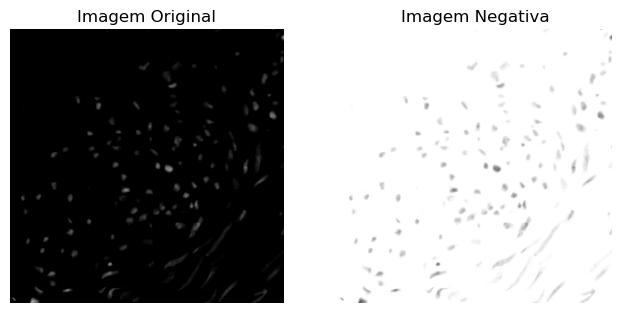

In [3]:
#imagem original
plt.figure(figsize=(12, 5))
plt.subplot(131)
plt.imshow(imagem_original, cmap='gray')
plt.title('Imagem Original')
plt.axis('off')

#imagem negativa
plt.subplot(132)
plt.imshow(imagem_negativa, cmap='gray')
plt.title('Imagem Negativa')
plt.axis('off')


plt.show()

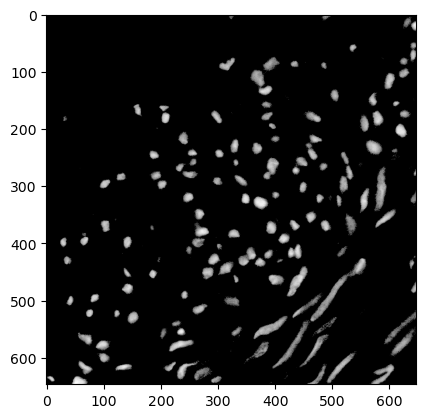

In [4]:
c = 255 / math.log(1 + np.max(imagem_original))

#função logarítmica
imagem_logaritmica = c * (np.log(imagem_original + 1))

imagem_logaritmica = np.uint8(imagem_logaritmica)

plt.imshow(imagem_logaritmica);


a)Abra a imagem 'pout.tif' e mostre seu histograma.

b)Equalize a imagem anterior e mostre novamente seu histograma.

c)Mostra a curva de transformação (consulte https://www.mathworks.com/help/images/histogram-equalization.html) (procurar função OpenCV)

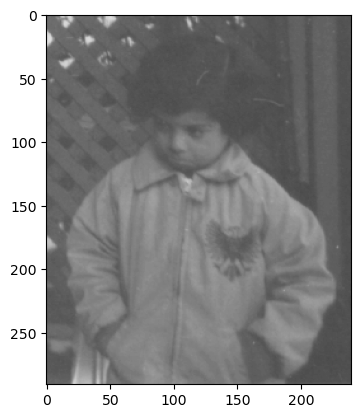

In [5]:
imagemp = cv2.imread('pout.tif', cv2.IMREAD_GRAYSCALE)
plt.imshow(imagemp, cmap='gray',vmin=0, vmax=255)

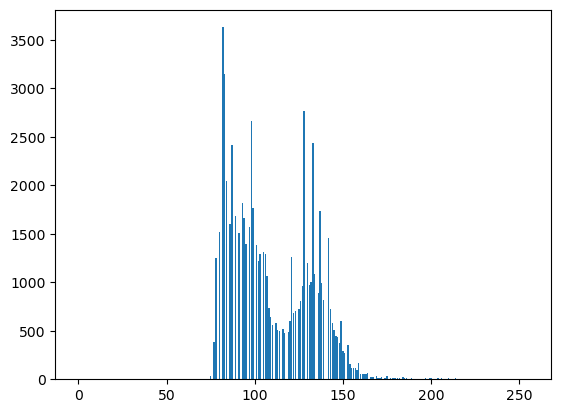

In [6]:
linha = imagemp.shape[0]
coluna = imagemp.shape[1]

array = np.zeros(256, dtype=int)

def gerarHistograma(imagem):
    for i in range(linha):
        for j in range(coluna):
            nivel_intensidade = imagem[i, j]
            array[nivel_intensidade] += 1
    hist = list(range(256))
    return hist


hist1 = gerarHistograma(imagemp)

plt.bar(hist1, array)
plt.show()

(array([[ 34., 176.,  51., ...,   6.,   6.,   5.],
        [ 19., 186.,  58., ...,   7.,   1.,   9.],
        [ 18., 180.,  69., ...,   7.,   1.,   7.],
        ...,
        [290.,   1.,   0., ...,   0.,   0.,   0.],
        [290.,   1.,   0., ...,   0.,   0.,   0.],
        [289.,   2.,   0., ...,   0.,   0.,   0.]]),
 array([ 74.,  89., 104., 119., 134., 149., 164., 179., 194., 209., 224.]),
 <a list of 240 BarContainer objects>)

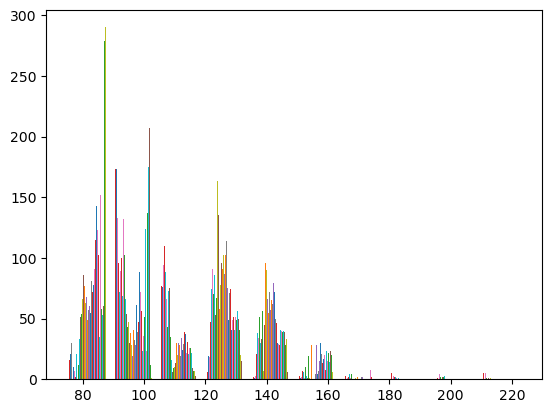

In [7]:
hist_original = plt.hist(imagemp)
hist_original

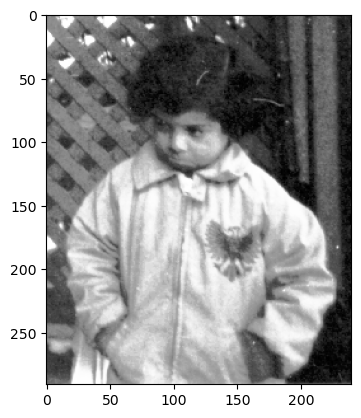

In [8]:
def equalizarImagem(imagem):
    hist_original, bins_original = np.histogram(imagem.flatten(), 256, [0, 256])
    probabilidade = hist_original / np.sum(hist_original)
    cdf = np.cumsum(probabilidade)
    nivel_cinza_equalizado = np.round(cdf * 255).astype(np.uint8)
    img_equalizada = nivel_cinza_equalizado[imagem]
    return img_equalizada


imagem_equalizada = equalizarImagem(imagemp)

plt.imshow(imagem_equalizada, cmap='gray')

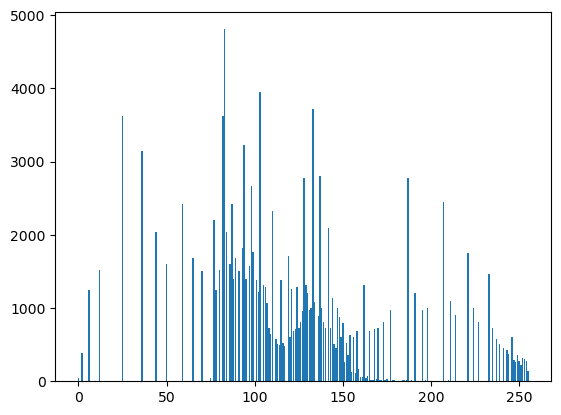

In [9]:
hist_equalizada = gerarHistograma(imagem_equalizada)

plt.bar(hist_equalizada, array)
plt.show()

(array([[  0.,   3.,  82., ...,   0.,   1.,  26.],
        [  0.,   2.,  75., ...,   0.,   0.,  24.],
        [  0.,   4.,  55., ...,   2.,   0.,  20.],
        ...,
        [215.,  73.,   2., ...,   0.,   0.,   0.],
        [208.,  77.,   5., ...,   0.,   0.,   0.],
        [186.,  91.,  13., ...,   0.,   0.,   0.]]),
 array([  0. ,  25.5,  51. ,  76.5, 102. , 127.5, 153. , 178.5, 204. ,
        229.5, 255. ]),
 <a list of 240 BarContainer objects>)

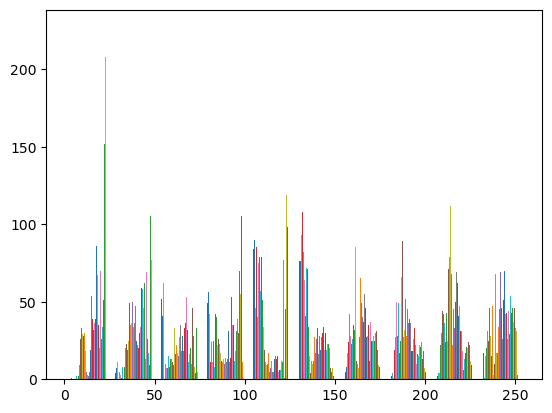

In [10]:
hist_eq = plt.hist(imagem_equalizada)
hist_eq 

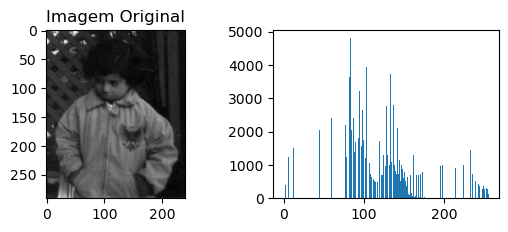

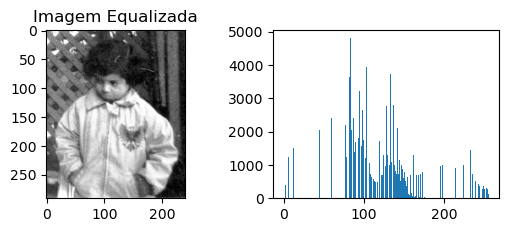

In [11]:
plt.subplot(2, 2, 1)
plt.imshow(imagemp, cmap='gray')
plt.title('Imagem Original')

plt.subplot(2, 2, 2)
plt.bar(hist1, array)
plt.show()

plt.subplot(2, 2, 3)
plt.imshow(imagem_equalizada, cmap='gray')
plt.title('Imagem Equalizada')

plt.subplot(2, 2, 4)
plt.bar(hist_equalizada, array)
plt.show()

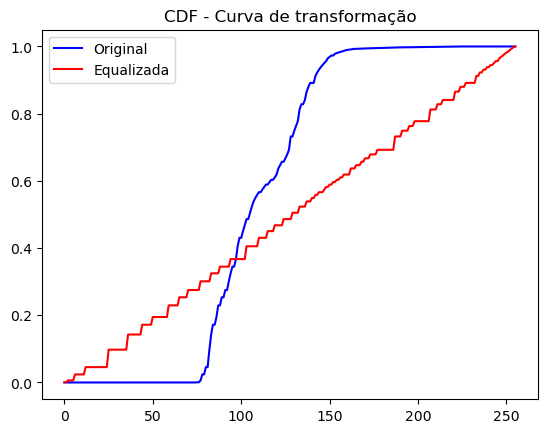

In [12]:
valoresRange = list(range(256))
hist_original, bins_original = np.histogram(imagemp.flatten(), 256, [0, 256])
probabilidade = hist_original / np.sum(hist_original)
cdf = np.cumsum(probabilidade)


hist_equa, bins_equa = np.histogram(imagem_equalizada.flatten(), 256, [0, 256])
probab = hist_equa / np.sum(hist_equa)
cdfe = np.cumsum(probab)


plt.plot(valoresRange, cdf, color='b', label='Original')
plt.plot(valoresRange, cdfe, color='r', label='Equalizada')
plt.title('CDF - Curva de transformação')
plt.legend()

plt.show()


a)Implemente o algoritmo de equalização de histograma e aplique a imagem ‘imcells.png’. Use o mínimos de laços for - tente realizar operações diretas com matrizes e vetores do numpy.

b)Aplique o mesmo algortimo 2x na mesma imagem e compare os resultados

In [13]:
imcells22 = cv2.imread('im_cells.png', cv2.IMREAD_GRAYSCALE)
imcells22_equalizada = equalizarImagem(imcells22)

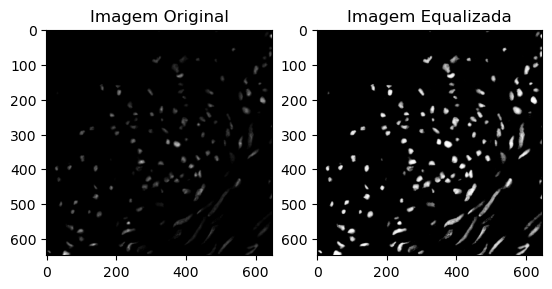

In [15]:
plt.subplot(1, 2, 1)
plt.imshow(imcells22, cmap='gray')
plt.title('Imagem Original')

plt.subplot(1, 2, 2)
plt.imshow(imcells22_equalizada, cmap='gray')
plt.title('Imagem Equalizada')

plt.show()